In [1]:
from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

<br><br>

# MALLET Path

Change the path below to the location of your local MALLET installation.

In [24]:
path_to_mallet = '/Volumes/Passport-1/packages/mallet-2.0.8/bin/mallet'  # CHANGE THIS TO YOUR MALLET PATH

<br><br>

# Load poetry dataset

Data is available here:  
https://www.kaggle.com/johnhallman/complete-poetryfoundationorg-dataset

In [11]:
poetry_path = '/Volumes/Passport-1/data/kaggle-poem-dataset/kaggle_poem_dataset.csv'  # CHANGE THIS TO YOUR DATASET PATH

In [12]:
poetry_df = pd.read_csv(poetry_path)
poetry_df.sample(5)

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
4813,4813,Lady Mary Wroth,from\n \n Pamphilia to Amphilanthus: 2,53570,"Love like a jugler, comes to play his prise,\n..."
38,38,Ted Kooser,Abandoned Farmhouse,52935,"He was a big man, says the size of his shoes\n..."
11053,11053,Karin Gottshall,The Raspberry Room,49783,"It was solid hedge, loops of bramble and thorn..."
15643,15643,Judith Kroll,Your Clothes,40812,"Of course they are empty shells, without hope ..."
2952,2952,Charles Bernstein,"Dear Mr. Fanelli,",50750,I saw your picture\nin the 79th street\nstatio...


In [13]:
print(len(poetry_df.index))

15652


In [14]:
training_data = [lmw.process_string(t) for t in poetry_df['Content'].tolist()]
training_data = [d for d in training_data if d.strip()]

len(training_data)

15644

In [64]:
training_data[10]

'heart let pity let live sad self hereafter kind charitable live tormented mind tormented mind tormenting yet cast comfort get groping round comfortless blind eyes dark day thirst find thirst world wet soul self come poor jackself advise jaded let call thoughts awhile elsewhere leave comfort root room let joy size god knows god knows whose smile wrung see unforeseen times rather skies betweenpie mountains lights lovely mile'

In [16]:
authors = poetry_df['Author'].tolist()

len(authors)

15652

In [17]:
lmw.print_dataset_stats(training_data)

Number of Documents: 15644
Mean Number of Words: 136.7
Vocabulary Size: 100635


<br><br>

# Train topic model

Depending on the size of your dataset, training can take a while. For very large datasets, I recommending training outside of a notebook.

If you're training in a Jupyter notebook, you can observe progress by checking the terminal window from which you started Jupyter. The MALLET output will also be printed at the end of training.

Note that training creates a copy of your dataset, so it might require significant space.

## Option A: Train using quick training function

Use this function if you want to quickly load the topic keys and distributions, without fine control over the training parameters and output paths.

In [28]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/maria/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

In [30]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, 
                                                              output_directory_path, 
                                                              num_topics, 
                                                              training_data)

Importing data...
Complete
Training topic model...

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 13336
total tokens: 2138605
<10> LL/token: -10.7386
<20> LL/token: -10.26073
<30> LL/token: -10.07065
<40> LL/token: -9.97794

0	0.25	world man life must yet whose men power self mind war human new many people nature could less within work 
1	0.25	NUM hit john watz also america holy day wyth jack three water two ten made san red men south non 
2	0.25	men god king sea lord gold high great old till blood like land wild man upon queen round made heaven 
3	0.25	like water light sky white trees wind green blue sun night dark air leaves sea rain river tree snow moon 
4	0.25	one death man world two time life great dead first word must face god men say nothing old body another 
5	0.25	land sea earth trees old hills mountains fields great river children mountain long island water lost ship among ocean sky 
6	0.25	like white back hair hand blue hands inside glass cut

In [40]:
assert(len(topic_distributions) == len(training_data))

In [31]:
for i, t in enumerate(topic_keys):
    print(i, '\t', t[:10])

0 	 ['man', 'must', 'may', 'life', 'whose', 'good', 'nature', 'still', 'would', 'well']
1 	 ['NUM', 'america', 'made', 'NUMth', 'face', 'american', 'san', 'john', 'new', 'war']
2 	 ['men', 'king', 'lord', 'god', 'war', 'man', 'blood', 'old', 'gold', 'land']
3 	 ['like', 'trees', 'leaves', 'green', 'tree', 'light', 'wind', 'sun', 'sky', 'white']
4 	 ['world', 'death', 'god', 'life', 'dead', 'time', 'earth', 'know', 'one', 'light']
5 	 ['sea', 'water', 'river', 'like', 'sky', 'wind', 'ocean', 'sand', 'waves', 'black']
6 	 ['like', 'room', 'back', 'street', 'door', 'window', 'house', 'blue', 'glass', 'across']
7 	 ['thy', 'thou', 'thee', 'shall', 'thus', 'heav', 'thir', 'god', 'thine', 'art']
8 	 ['little', 'let', 'got', 'eat', 'say', 'good', 'get', 'old', 'dog', 'come']
9 	 ['like', 'blood', 'black', 'skin', 'eyes', 'red', 'back', 'hands', 'fire', 'mouth']
10 	 ['like', 'know', 'one', 'say', 'would', 'think', 'way', 'could', 'want', 'see']
11 	 ['like', 'night', 'light', 'upon', 'day', '

In [34]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.65 much madness divinest sense discerning eye much sense starkest madness tis majority prevail assent sane demur straightway dangerous handled chain

0.5893 never think fortune bear sway virtue force cause obey

0.5856 think paper comes vain pretense move pity mourn offense well know hard obdurate heart softening mercy take part woman arguments prevail even patron wise example fails last privilege still retain oppressed injured always may complain severely laws honor bind weak submissive sex womankind sighs gained force compelled hand deceived art urged stern command whatever motive binds fatal tie judging world expects constancy heaven sure heaven justice reign though tricks sacred name profane appealing submit cause fear judgment impartial laws bargains conditional made purchase void creditor unpaid defrauded servants service free wounded slave regains liberty wives ill used remedy remains daily racks condemned eternal chains whence unjust distinction grown formed passions like nat

## Option B: Train using import and training functions

Use these functions to have more control over the training parameters and output paths.

In [42]:
num_topics = 20  # CHANGE THIS TO YOUR PREFERRED NUMBER OF TOPICS

output_directory_path = '/Users/maria/Desktop/lmw-output' # CHANGE THIS TO YOUR OUTPUT DIRECTORY

path_to_training_data           = output_directory_path + '/training.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.training'
path_to_model                   = output_directory_path + '/mallet.model.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keys.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributions.' + str(num_topics)

In [43]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [44]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 13336
total tokens: 2138605
<10> LL/token: -10.69496
<20> LL/token: -10.25651
<30> LL/token: -10.07832
<40> LL/token: -9.97621

0	0.25	man old dead little night heart come death mother sleep day life eyes men love let hear long know time 
1	0.25	thy thou thee shall yet love thus fair hath may art though still doth heav whose thir tis thine heart 
2	0.25	one like sweet eyes upon song flowers heart even yet life spring air still sing beneath flower sun many whose 
3	0.25	room house one door back window like street still around across behind inside outside open small night glass windows dark 
4	0.25	love god let soul life yet death world earth may heart heaven man never one day must things upon praise 
5	0.25	one time even world life without something nothing people many though words first way always things much mind also know 
6	0.25	said came one could saw would went made knew took st

In [49]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keys.20')

for i, t in enumerate(topic_keys):
    print(i, '\t', t[:10])

0 	 ['man', 'mother', 'one', 'dead', 'love', 'come', 'let', 'father', 'woman', 'know']
1 	 ['thy', 'thou', 'thee', 'thus', 'shall', 'yet', 'heav', 'thir', 'hath', 'god']
2 	 ['heart', 'love', 'upon', 'sweet', 'eyes', 'like', 'soul', 'yet', 'day', 'shall']
3 	 ['one', 'room', 'like', 'window', 'house', 'door', 'back', 'street', 'light', 'glass']
4 	 ['love', 'must', 'may', 'let', 'shall', 'yet', 'life', 'would', 'world', 'give']
5 	 ['one', 'self', 'even', 'life', 'time', 'sense', 'human', 'mind', 'yet', 'something']
6 	 ['said', 'could', 'one', 'would', 'came', 'saw', 'went', 'knew', 'thought', 'took']
7 	 ['NUM', 'hym', 'hit', 'ful', 'watz', 'alle', 'hem', 'bot', 'wyth', 'may']
8 	 ['poem', 'read', 'book', 'write', 'poetry', 'way', 'poet', 'words', 'poems', 'writing']
9 	 ['men', 'king', 'lord', 'god', 'land', 'war', 'old', 'great', 'blood', 'gold']
10 	 ['like', 'got', 'get', 'back', 'girl', 'says', 'home', 'day', 'time', 'good']
11 	 ['like', 'eyes', 'blood', 'hand', 'hair', 'body',

In [50]:
topic_distributions = lmw.load_topic_distributions(output_directory_path + '/mallet.topic_distributions.20')

len(topic_distributions), len(topic_distributions[0])

(15644, 20)

In [51]:
assert(len(topic_distributions) == len(training_data))

In [52]:
for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

0.75 children napoleon bonaparte born asks teacher thousand years ago children say hundred years ago children say last year children say one knows children napoleon bonaparte asks teacher won war children say lost war children say one knows butcher dog called napoleon says frantisek butcher used beat dog died hunger year ago children sorry napoleon

0.694 remember mama girl mama girl biding turn girl turn mama got turn girl girl girl make girl mama mine three remember dreamed dreams dreams remembers girl made mama made mama got tell tell know know man make dream remember ain man mine mine turn dream make mine make mine won bide won turn

0.6844 melt waxen man sister helen day third since began time long yet time ran little brother mother mary mother three days day hell heaven done work aright sister helen let play said might still play night little brother mother mary mother third night night hell heaven said must melt ere vesper bell sister helen molten well even nay peace cannot tell

<br><br>

# Plot topics by category

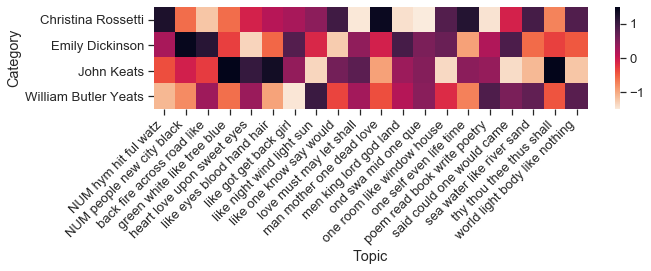

In [53]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

lmw.plot_categories_by_topics_heatmap(authors,
                                      topic_distributions,
                                      topic_keys, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim=(10,4))

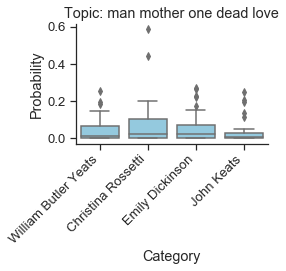

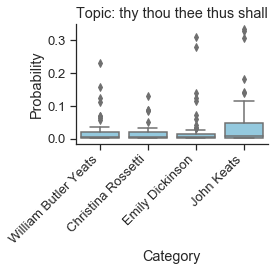

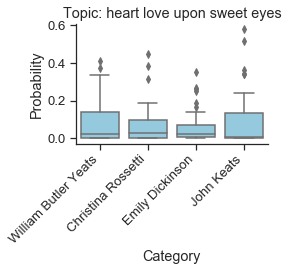

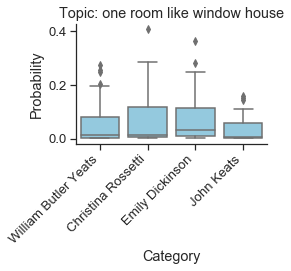

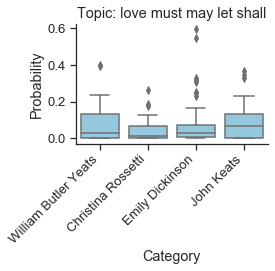

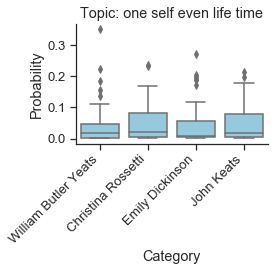

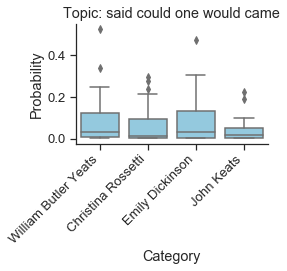

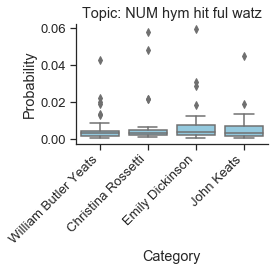

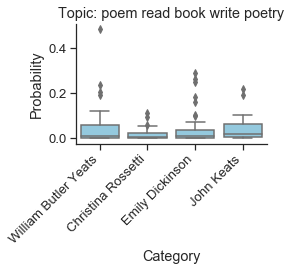

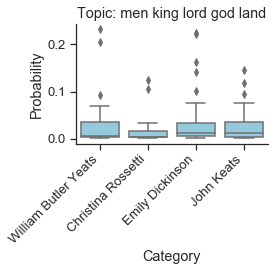

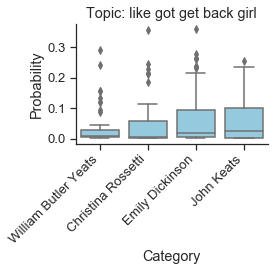

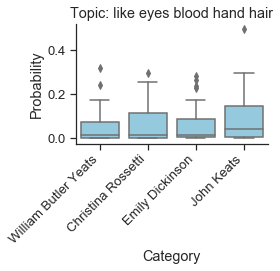

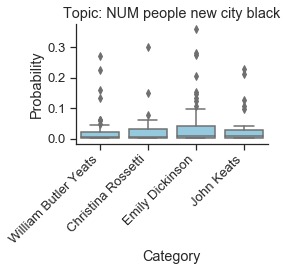

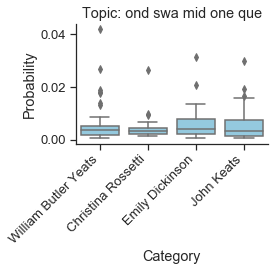

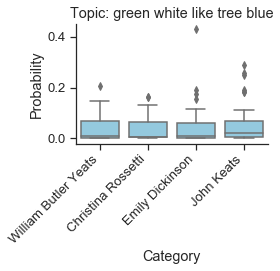

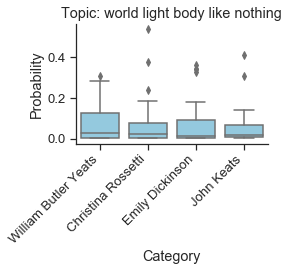

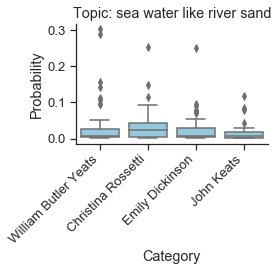

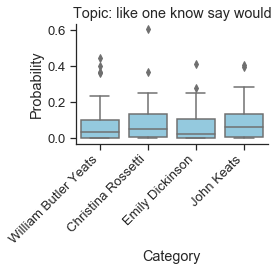

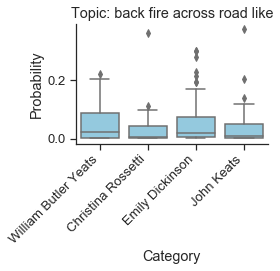

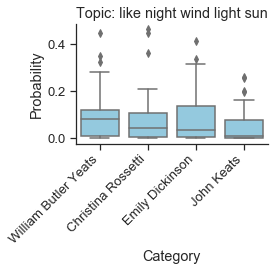

In [55]:
target_labels = ['John Keats', 'Emily Dickinson', 'William Butler Yeats', 'Christina Rossetti']

for _topic_index in range(0, len(topic_keys)):
    
    lmw.plot_categories_by_topic_boxplots(authors,
                                          topic_distributions,
                                          topic_keys, 
                                          _topic_index,
                                          output_path=output_directory_path + '/boxplot.' + str(_topic_index) + '.pdf',
                                          target_labels=target_labels,
                                          dim=(4,4))

<br><br>

# Plot topics over document time

Splits each training document into N chunks, infers the topics for those chunks (using the pre-trained topic model), and plots mean topic probabilities over document time.

In [57]:
divided_documents, document_ids, times = lmw.divide_training_data(training_data,
                                                                  num_chunks=10)

len(divided_documents), len(document_ids), len(times)

(156440, 156440, 156440)

In [58]:
path_to_divided_training_data           = output_directory_path + '/training.split.txt'
path_to_divided_formatted_training_data = output_directory_path + '/mallet.split.training'
path_to_divided_topic_distributions     = output_directory_path + '/mallet.split.topic_distributions.' + str(num_topics)

In [59]:
lmw.import_data(path_to_mallet,
                path_to_divided_training_data,
                path_to_divided_formatted_training_data,
                divided_documents,
                path_to_formatted_training_data)

Importing data using pipe...
 Rewriting extended pipe from /Users/maria/Desktop/lmw-output/mallet.training
  Instance ID = 0dab26a6825bcf75:34d50484:1721dccc830:-7ffb


Complete


In [60]:
lmw.infer_topics(path_to_mallet,
                 path_to_model,
                 path_to_divided_formatted_training_data,
                 path_to_divided_topic_distributions)

Inferring topics using pre-trained model...
Complete


In [61]:
topic_distributions = lmw.load_topic_distributions(path_to_divided_topic_distributions)

len(topic_distributions), len(topic_distributions[2])

(156440, 20)

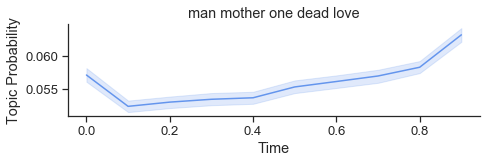

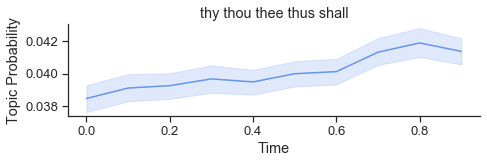

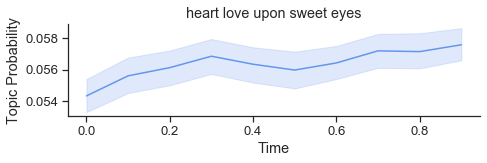

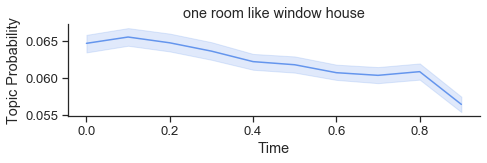

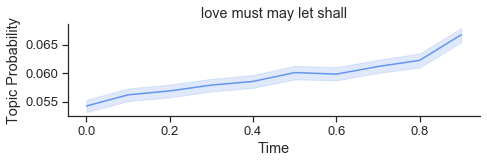

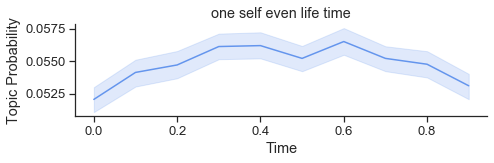

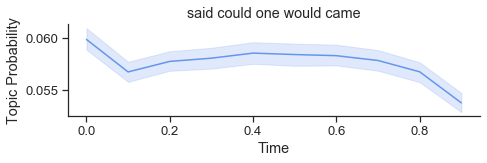

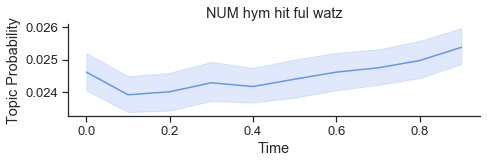

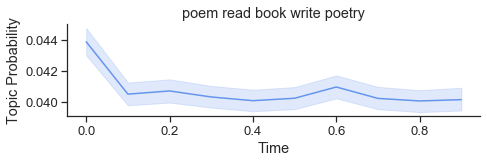

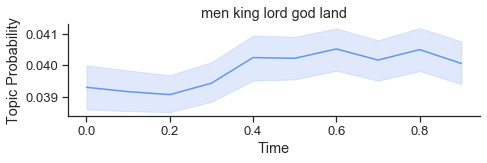

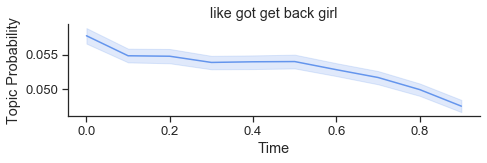

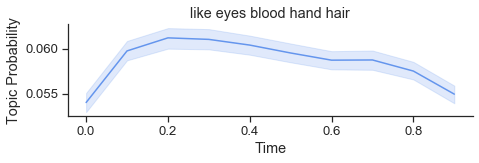

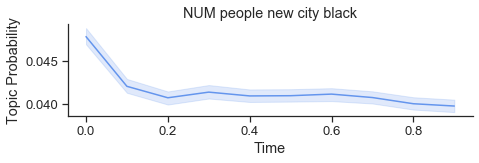

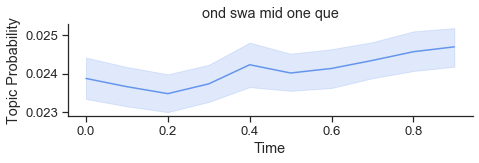

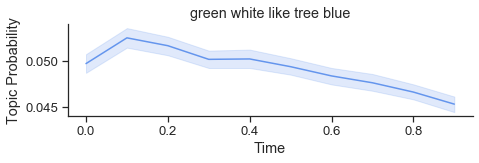

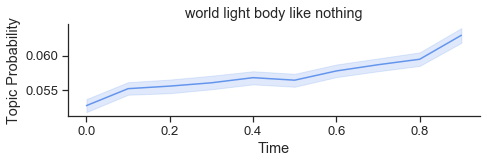

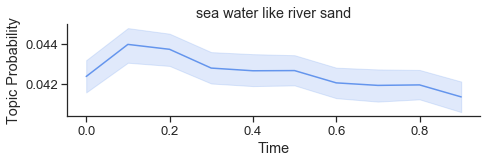

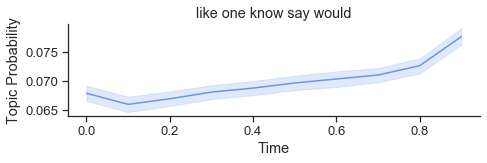

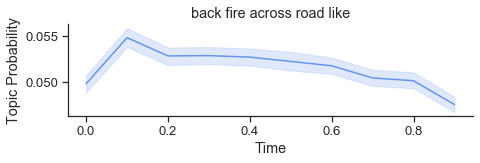

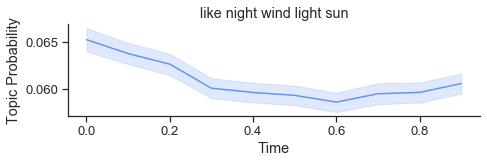

In [62]:
for _topic_index in range(0, len(topic_keys)):
    lmw.plot_topics_over_time(topic_distributions, topic_keys, times, _topic_index)